This dataset is related to Dengue disease patient, so I want to represent life cycle as per test sample per day.
So basically this module represents the scene of improvement in the patient's body.

In [1]:
# importing required model

# for dataFrame
import pandas as pd

# for numerical operation like array, matrix and advance calculation
import numpy as np

# for data visualization perpose
import matplotlib.pyplot as plt
import os
# for ignore unwanted error
import warnings
warnings.filterwarnings("ignore")

#--- Model---
from sklearn.linear_model import LogisticRegression

#--- Result---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#--- train/test data---
from sklearn.model_selection import train_test_split
from random import randrange
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# data reading from system csv format
# and convert to DataFrame---df

In [3]:
data = pd.read_csv(r'D:\\AryanHospitalDengue.csv')
df = pd.DataFrame(data)
df

,index,Timestamp,Name,AGE,Temp,RBC,Hmgbn,Leukocyte,neutrophils,lymphocytes,...,ESR,PCV,MCV,MCH,MCHC,Platelet,SGOT,SGPT,USG_SCR,Serum_Creat
0,1,03-01-2020,ADARSH,26,104,4.49,12.60,3300,77,15,...,0.8,38.4,85.5,28.1,32.8,0.78,84,66,20.0,0.0
1,2,04-01-2020,ADARSH,26,103,4.54,12.46,1900,69,27,...,1.8,39.2,86.3,28.4,32.9,0.53,82,57,21.0,1.4
2,3,05-01-2020,ADARSH,26,104,4.84,12.16,2400,63,30,...,2.8,41.5,85.7,28.7,33.5,0.43,63,50,22.0,0.0
3,4,06-01-2020,ADARSH,26,100,4.65,12.46,3700,48,45,...,2.9,39.6,85.2,28.4,33.3,0.35,119,56,17.0,0.0
4,5,07-01-2020,ADARSH,26,98,4.70,13.13,6300,34,58,...,3.1,39.2,83.4,28.3,33.9,0.28,213,86,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,13-09-2021,PEETER,29,100,4.65,13.12,3700,48,45,...,2.9,39.6,85.2,28.4,33.3,0.85,119,56,17.0,0.0
620,621,14-09-2021,PEETER,29,98,4.17,13.30,6300,34,58,...,3.1,39.2,83.4,28.3,33.9,0.38,213,86,16.0,0.0
621,622,15-09-2021,PEETER,29,98,4.87,12.80,5100,25,65,...,11.0,38.5,86.1,28.6,33.2,0.30,189,90,11.0,0.0
622,623,16-09-2021,PEETER,29,98,4.74,13.50,4400,33,56,...,20.0,40.1,85.3,28.7,33.7,0.50,131,75,12.0,0.0


In [4]:
# data information check
# df.info

In [5]:
# data information check
# df.info()

In [6]:
# Data type checking from describe function-- basically only read numerical data
df.describe()

,index,AGE,Temp,RBC,Hmgbn,Leukocyte,neutrophils,lymphocytes,monocytes,eosinophils,...,ESR,PCV,MCV,MCH,MCHC,Platelet,SGOT,SGPT,USG_SCR,Serum_Creat
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.00000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.00000,624.000000
mean,312.500000,35.230769,100.298077,4.610096,13.029615,4187.500000,51.009615,42.000000,5.375000,2.250000,...,7.800000,39.80000,85.425000,28.412500,33.250000,0.888558,117.125000,64.375000,15.67500,0.188462
std,180.277564,13.846137,2.566158,0.231534,0.514534,1570.045904,18.090460,16.183935,1.495982,0.829821,...,7.622047,1.21547,0.844404,0.226221,0.406528,0.768695,54.300872,17.456309,5.13143,0.478221
min,1.000000,16.000000,98.000000,3.840000,12.160000,1900.000000,24.000000,15.000000,3.000000,1.000000,...,0.800000,38.40000,83.400000,28.100000,32.700000,0.280000,56.000000,35.000000,6.40000,0.000000
25%,156.750000,26.000000,98.000000,4.470000,12.600000,3075.000000,33.000000,29.250000,4.750000,2.000000,...,2.550000,39.02500,85.275000,28.250000,32.875000,0.380000,77.250000,54.500000,11.75000,0.000000
50%,312.500000,32.000000,99.000000,4.640000,13.120000,4050.000000,51.000000,42.500000,5.000000,2.000000,...,3.000000,39.40000,85.600000,28.400000,33.250000,0.530000,101.500000,61.500000,16.50000,0.000000
75%,468.250000,42.000000,103.000000,4.740000,13.500000,5400.000000,66.000000,56.500000,6.250000,2.250000,...,13.250000,40.45000,85.950000,28.625000,33.550000,1.430000,145.500000,77.750000,20.25000,0.000000
max,624.000000,66.000000,104.000000,5.280000,13.900000,6400.000000,78.000000,65.000000,8.000000,4.000000,...,20.000000,41.90000,86.300000,28.700000,33.900000,3.480000,213.000000,90.000000,22.00000,1.400000


In [7]:
# data reading of row 
df.iloc[:1].values

array([[1, '03-01-2020', 'ADARSH', 26, 104, 4.49, 12.6, 3300, 77, 15, 6,
        2, 0, 0.8, 38.4, 85.5, 28.1, 32.8, 0.78, 84, 66, 20.0, 0.0]],
      dtype=object)

In [8]:
# column name reading
df.columns

Index(['index', 'Timestamp', 'Name', 'AGE', 'Temp', 'RBC', 'Hmgbn',
       'Leukocyte', 'neutrophils', 'lymphocytes', 'monocytes', 'eosinophils',
       'basophils', 'ESR', 'PCV', 'MCV', 'MCH', 'MCHC', 'Platelet', 'SGOT',
       'SGPT', 'USG_SCR', 'Serum_Creat'],
      dtype='object')

In [9]:
# columns creating for sample testing and predicting

df['target1'] = df.apply(lambda row: row.Leukocyte <=4000, axis = 1)
df['target2'] = df.apply(lambda row: row.Platelet >=1.4, axis = 1)
df.head()

,index,Timestamp,Name,AGE,Temp,RBC,Hmgbn,Leukocyte,neutrophils,lymphocytes,...,MCV,MCH,MCHC,Platelet,SGOT,SGPT,USG_SCR,Serum_Creat,target1,target2
0,1,03-01-2020,ADARSH,26,104,4.49,12.60,3300,77,15,...,85.5,28.1,32.8,0.78,84,66,20.0,0.0,True,False
1,2,04-01-2020,ADARSH,26,103,4.54,12.46,1900,69,27,...,86.3,28.4,32.9,0.53,82,57,21.0,1.4,True,False
2,3,05-01-2020,ADARSH,26,104,4.84,12.16,2400,63,30,...,85.7,28.7,33.5,0.43,63,50,22.0,0.0,True,False
3,4,06-01-2020,ADARSH,26,100,4.65,12.46,3700,48,45,...,85.2,28.4,33.3,0.35,119,56,17.0,0.0,True,False
4,5,07-01-2020,ADARSH,26,98,4.70,13.13,6300,34,58,...,83.4,28.3,33.9,0.28,213,86,16.0,0.0,False,False


In [10]:
# after columns creating values is filled True & False, so i replace the value from o and 1

def target1(value):
    if value <= 4000:
        return 1
    else:
        return 0
    
def target2(value):
    if value <= 1.4:
        return 1
    else:
        return 0
 
df['target1'] = df['Leukocyte'].map(target1)
df['target2'] = df['Platelet'].map(target2)
# df1['Detected'] = df1['Temp'].map(Temp)

display(df.head())

,index,Timestamp,Name,AGE,Temp,RBC,Hmgbn,Leukocyte,neutrophils,lymphocytes,...,MCV,MCH,MCHC,Platelet,SGOT,SGPT,USG_SCR,Serum_Creat,target1,target2
0,1,03-01-2020,ADARSH,26,104,4.49,12.60,3300,77,15,...,85.5,28.1,32.8,0.78,84,66,20.0,0.0,1,1
1,2,04-01-2020,ADARSH,26,103,4.54,12.46,1900,69,27,...,86.3,28.4,32.9,0.53,82,57,21.0,1.4,1,1
2,3,05-01-2020,ADARSH,26,104,4.84,12.16,2400,63,30,...,85.7,28.7,33.5,0.43,63,50,22.0,0.0,1,1
3,4,06-01-2020,ADARSH,26,100,4.65,12.46,3700,48,45,...,85.2,28.4,33.3,0.35,119,56,17.0,0.0,1,1
4,5,07-01-2020,ADARSH,26,98,4.70,13.13,6300,34,58,...,83.4,28.3,33.9,0.28,213,86,16.0,0.0,0,1


In [11]:
# df['Output'] = df.apply(lambda row: row.Leukocyte_stats or row.Pt_stats, axis = 1)
# df1.drop(columns = 'Unnamed: 28', axis=1)
# df1.drop(columns = 'DISCHARE', axis=1)

# columns to columns operations--- logic gate--OR operator apply for dangue test detected according to test report of patient

df['Detected'] = df.target1 | df.target2
df[['Temp','Leukocyte','Platelet','target1','target2','Detected']]


,Temp,Leukocyte,Platelet,target1,target2,Detected
0,104,3300,0.78,1,1,1
1,103,1900,0.53,1,1,1
2,104,2400,0.43,1,1,1
3,100,3700,0.35,1,1,1
4,98,6300,0.28,0,1,1
...,...,...,...,...,...,...
619,100,3700,0.85,1,1,1
620,98,6300,0.38,0,1,1
621,98,5100,0.30,0,1,1
622,98,4400,0.50,0,1,1


# converting the data for visualize Medical Test Report By HEATMAP 

if people suffering the Dengue, that time 
PLATELETS going to down below 1.5 Lac,
LEUKOCYTE decreasing the body below 4000k and 
TEMPRATURE (fever) continue repeating per day after 6 Hrs. These are main when the peoplr infected.



In [12]:
report = df[['Temp','RBC','Hmgbn','Leukocyte','lymphocytes','Platelet','SGOT']].head(7).astype(int).values
report

array([[ 104,    4,   12, 3300,   15,    0,   84],
       [ 103,    4,   12, 1900,   27,    0,   82],
       [ 104,    4,   12, 2400,   30,    0,   63],
       [ 100,    4,   12, 3700,   45,    0,  119],
       [  98,    4,   13, 6300,   58,    0,  213],
       [  98,    4,   12, 5100,   65,    0,  189],
       [  98,    4,   13, 4400,   56,    0,  131]])

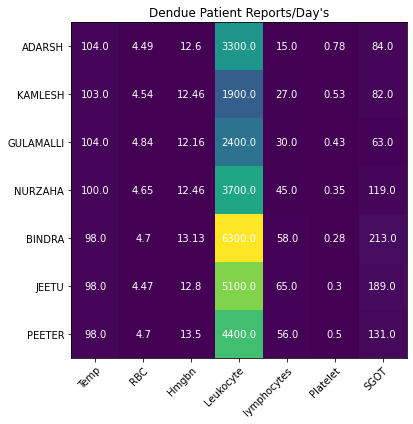

In [32]:
Test_Name = ['Temp','RBC','Hmgbn','Leukocyte','lymphocytes','Platelet','SGOT']
Paitent_Name = df['Name'].head(50).drop_duplicates().values
report = df[['Temp','RBC','Hmgbn','Leukocyte','lymphocytes','Platelet','SGOT']].head(7).values

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(report)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Test_Name)), labels=Test_Name)
ax.set_yticks(np.arange(len(Paitent_Name)), labels=Paitent_Name)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

#Loop over data dimensions and create text annotations.
for i in range(len(Test_Name)):
    for j in range(len(Paitent_Name)):
        text = ax.text(j, i, report[i, j],
                      ha="center", va="center", color="w")

ax.set_title("Dendue Patient Reports/Day's")
fig.tight_layout()
plt.show()
                       

In [14]:
# Removing the Nul Value if available in my dataset and count the total nul value
print("How many null values in the Diabetes DataSet:",df.isnull().any().sum())

How many null values in the Diabetes DataSet: 0


In [15]:
# inside dataframe values iterating in array format
df.columns

Index(['index', 'Timestamp', 'Name', 'AGE', 'Temp', 'RBC', 'Hmgbn',
       'Leukocyte', 'neutrophils', 'lymphocytes', 'monocytes', 'eosinophils',
       'basophils', 'ESR', 'PCV', 'MCV', 'MCH', 'MCHC', 'Platelet', 'SGOT',
       'SGPT', 'USG_SCR', 'Serum_Creat', 'target1', 'target2', 'Detected'],
      dtype='object')

In [16]:
df1=df[['Temp','RBC','Hmgbn','Leukocyte','lymphocytes','Platelet','SGOT','SGPT']].values
df1
df

,index,Timestamp,Name,AGE,Temp,RBC,Hmgbn,Leukocyte,neutrophils,lymphocytes,...,MCH,MCHC,Platelet,SGOT,SGPT,USG_SCR,Serum_Creat,target1,target2,Detected
0,1,03-01-2020,ADARSH,26,104,4.49,12.60,3300,77,15,...,28.1,32.8,0.78,84,66,20.0,0.0,1,1,1
1,2,04-01-2020,ADARSH,26,103,4.54,12.46,1900,69,27,...,28.4,32.9,0.53,82,57,21.0,1.4,1,1,1
2,3,05-01-2020,ADARSH,26,104,4.84,12.16,2400,63,30,...,28.7,33.5,0.43,63,50,22.0,0.0,1,1,1
3,4,06-01-2020,ADARSH,26,100,4.65,12.46,3700,48,45,...,28.4,33.3,0.35,119,56,17.0,0.0,1,1,1
4,5,07-01-2020,ADARSH,26,98,4.70,13.13,6300,34,58,...,28.3,33.9,0.28,213,86,16.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,13-09-2021,PEETER,29,100,4.65,13.12,3700,48,45,...,28.4,33.3,0.85,119,56,17.0,0.0,1,1,1
620,621,14-09-2021,PEETER,29,98,4.17,13.30,6300,34,58,...,28.3,33.9,0.38,213,86,16.0,0.0,0,1,1
621,622,15-09-2021,PEETER,29,98,4.87,12.80,5100,25,65,...,28.6,33.2,0.30,189,90,11.0,0.0,0,1,1
622,623,16-09-2021,PEETER,29,98,4.74,13.50,4400,33,56,...,28.7,33.7,0.50,131,75,12.0,0.0,0,1,1


In [17]:
# Pridicting the value and fixing the area which are required for testing and training the modue
x=  df1[:,:]
x

array([[104.  ,   4.49,  12.6 , ...,   0.78,  84.  ,  66.  ],
       [103.  ,   4.54,  12.46, ...,   0.53,  82.  ,  57.  ],
       [104.  ,   4.84,  12.16, ...,   0.43,  63.  ,  50.  ],
       ...,
       [ 98.  ,   4.87,  12.8 , ...,   0.3 , 189.  ,  90.  ],
       [ 98.  ,   4.74,  13.5 , ...,   0.5 , 131.  ,  75.  ],
       [ 98.  ,   5.1 ,  13.7 , ...,   1.48,  56.  ,  35.  ]])

In [18]:
# fixing my Target and column location
y = df.iloc[:,-1]   
y

0      1
1      1
2      1
3      1
4      1
      ..
619    1
620    1
621    1
622    1
623    0
Name: Detected, Length: 624, dtype: int64

In [19]:
print(x)

[[104.     4.49  12.6  ...   0.78  84.    66.  ]
 [103.     4.54  12.46 ...   0.53  82.    57.  ]
 [104.     4.84  12.16 ...   0.43  63.    50.  ]
 ...
 [ 98.     4.87  12.8  ...   0.3  189.    90.  ]
 [ 98.     4.74  13.5  ...   0.5  131.    75.  ]
 [ 98.     5.1   13.7  ...   1.48  56.    35.  ]]


In [20]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
619    1
620    1
621    1
622    1
623    0
Name: Detected, Length: 624, dtype: int64


# apply the LogisticRegression module and some more related for train and test regarding

In [21]:
# apply the train test parameters
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =  0) # Feature Scaling

In [22]:
#randomly check the data
x_train 

array([[103.  ,   4.49,  12.26, ...,   1.78,  84.  ,  66.  ],
       [104.  ,   4.49,  12.6 , ...,   0.78,  84.  ,  66.  ],
       [104.  ,   4.83,  13.9 , ...,   0.43,  63.  ,  50.  ],
       ...,
       [ 98.  ,   4.88,  13.7 , ...,   2.48,  56.  ,  35.  ],
       [104.  ,   4.49,  12.6 , ...,   0.78,  84.  ,  66.  ],
       [ 98.  ,   4.88,  13.7 , ...,   1.48,  56.  ,  35.  ]])

In [23]:
#randomly check the data
y_train  

576    1
312    1
122    1
564    1
409    1
      ..
277    1
9      1
359    0
192    1
559    0
Name: Detected, Length: 499, dtype: int64

In [24]:
x_test

array([[9.800e+01, 4.170e+00, 1.313e+01, 6.300e+03, 5.800e+01, 2.800e-01,
        2.130e+02, 8.600e+01],
       [1.000e+02, 4.450e+00, 1.246e+01, 3.700e+03, 4.500e+01, 3.500e-01,
        1.190e+02, 5.600e+01],
       [1.030e+02, 4.390e+00, 1.260e+01, 3.300e+03, 1.500e+01, 1.780e+00,
        8.400e+01, 6.600e+01],
       [1.030e+02, 4.540e+00, 1.246e+01, 1.900e+03, 2.700e+01, 5.300e-01,
        8.200e+01, 5.700e+01],
       [9.800e+01, 4.300e+00, 1.313e+01, 6.300e+03, 5.800e+01, 3.800e-01,
        2.130e+02, 8.600e+01],
       [9.800e+01, 4.700e+00, 1.330e+01, 6.300e+03, 5.800e+01, 2.800e-01,
        2.130e+02, 8.600e+01],
       [1.000e+02, 4.660e+00, 1.246e+01, 3.700e+03, 4.500e+01, 3.500e-01,
        1.190e+02, 5.600e+01],
       [9.800e+01, 4.700e+00, 1.350e+01, 4.400e+03, 5.600e+01, 5.000e-01,
        1.310e+02, 7.500e+01],
       [9.800e+01, 4.700e+00, 1.350e+01, 4.400e+03, 5.600e+01, 5.500e-01,
        1.310e+02, 7.500e+01],
       [9.800e+01, 4.470e+00, 1.280e+01, 5.100e+03, 6.5

In [25]:
y_test

356    1
299    1
424    1
313    1
428    1
      ..
465    1
343    0
361    1
75     1
10     1
Name: Detected, Length: 125, dtype: int64

In [26]:
# model develop

#Algorithm call for Data Fit  -- LogisticRegression
# Data fit model -- fit intercept = True
# Attribute call --- c=1e15
logistic_model = LogisticRegression(fit_intercept = True, C=1e15)

# # result test
logistic_model.fit(x_train,y_train)

# after fited data values predicted
predicted = logistic_model.predict(x_test)

In [27]:
# predicted value after testing & training 
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [28]:
#apply confusion matric for better predictin process
print("Confusion Metrix")
matrix = confusion_matrix(y_test,predicted)
print(matrix)

Confusion Metrix
[[ 12   0]
 [  0 113]]


In [29]:
# describe the details of Classification_Report

print("\nClassification_Report")
report = classification_report(y_test,predicted)
print(report)


Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00       113

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [30]:
# cheking the ACCURACY OF Implemented Machine Learning model
lr_accuracy = accuracy_score(y_test, predicted)
lr_accuracy
print("Logistic Regression Accuracy of Scikit Model: {:.2f}%".format(lr_accuracy*100))    # after decimal value range
                                                                                          # for apply "{:.2f}%"

Logistic Regression Accuracy of Scikit Model: 100.00%


# After making project I want to check my model so, I puted the randam value from my dataset

In [31]:
s = [26,104,4.49,12.60,3300,0.78,84,66]   #-->1   Testing value sample of dangue patient   Detected
s1 =[26,98,4.88,13.70,6400,3.48,56,35]   # --> 0  Testing value sample of dangue patient  Not Detected

input_data = s
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logistic_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("You haven't a Dengue...!")
else:
  print('You have a Dengue...!  Please meet your Doctor.')

[1]
You have a Dengue...!  Please meet your Doctor.
